# Continuation from ndarray.py 

If you want a copy of a slice from a `ndarray` you need to explicitly run `.copy()`

In [2]:
import numpy as np 
arr = np.arange(10)
arr_slice = arr[5:8].copy()
print(arr_slice)

[5 6 7]


With higher dimensional slicing, you have more options. For example, a 2d array will contain 1d arrays at each index. 

In [3]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("2d array:\n", arr2d)

2d array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
print(arr2d[2])

[7 8 9]


Access the second element from the second 1d array: 


In [5]:
print(arr2d[2][2])

# or 

print(arr2d[2, 2])

9
9


Note how we refer to the axes of the 2 dimensional array. 
- Axis 0 = rows,
- Axis 1 = columns

In multidimensional arrays, if you omit later indeces when indexing (i.e. you dont specify a value for each dimension in the array when indexing), the result will be a lower dimensional array. 

In [6]:
arr3d = np.array([[[1,2,3],[4,5,6]], [[1,2,3],[4,5,6]], [[1,2,3],[4,5,6]]])
print("3d array:\n", arr3d)

3d array:
 [[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


In [7]:
print("Indexing 3d array:\n\n", "arr3d[0]\n\n", arr3d[0])

Indexing 3d array:

 arr3d[0]

 [[1 2 3]
 [4 5 6]]


Just like in lower dimensions, both scalar values and arrays can be assigned to this view. **(we say view, because unless we explicitly make a copy, the subsection of the array that has been selected returns a view of the array)**

## Indexing with Slices

A slce selects a range along an axis. Let's select the forst two rows of arr2d

In [8]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
# i.e., select up to, but not including, row 2. 
# in other words, select rows 0, 1. 
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

You can also pass more than one slice just like with indexing. 

In [10]:
# select up to the first two rows along the 0th axis, select up to the first column on the 1st axis. 
arr2d[:2, :1]

array([[1],
       [4]])

**Again, by slicing like this, you always obtain array views of the same number of dimensions.**

Remember a colon `:` by itself means to take the entire selection on that axis. Also, assigning to a slice experssion assigns to the whole selection.

## Boolean Indexing

** Selecting data from an array by boolean indexing ALWAYS creates a copy of the data, even if the returned array is unchanged.**

Start with array of names with duplicates. 

In [11]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

print("\nnames\n", names)


names
 ['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


Use `randn` function from `np.random` to generate some normally distributed data `data.

In [12]:
data = np.random.randn(7,4)
data

array([[-0.13133105,  1.60639218, -0.77072438,  0.75194125],
       [ 1.68116741, -0.17839749,  0.20342996, -1.02552934],
       [ 0.01777773,  1.21166826, -1.03866143, -0.79377113],
       [-1.20779184,  0.42076527,  1.16267236,  0.15364609],
       [-0.72138298, -0.56160268,  0.6708208 ,  0.01869139],
       [-0.36651192,  0.17141138, -1.12888781,  0.93215716],
       [-1.10718444,  1.31854739, -1.6817216 ,  0.45136318]])

Even though `data` has nothing to do with names, we are going to make a boolean array using `names`, and index `data` with that.

In [13]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

You can also assign a variable name to this condition: 
- `condition = names == "Bob`

In [14]:
data[names == "Bob"]

array([[-0.13133105,  1.60639218, -0.77072438,  0.75194125],
       [-1.20779184,  0.42076527,  1.16267236,  0.15364609]])

Just make sure that the boolean array is of the same length as the array its axis is indexing. 

Note, you can also make a bool array for values that are not equal to bob by using the following syntax:
- `names != "Bob"`
- `~(names == "Bob")`

In [15]:
names_too_long = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe', "Arthur"])

In [16]:
data[names_too_long =="Bob"]

IndexError: boolean index did not match indexed array along axis 0; size of axis is 7 but size of corresponding boolean axis is 8

**IndexError: boolean index did not match indexed array along axis 0; size of axis is 7 but size of corresponding boolean axis is 8**

Assigning a variable name to the condition is an easier way to use the latter syntax for negation: 
- `~(condition)`

You can mix and match bool arrays with indexes as well if you would like to narrow down your search even more. 

**Note:** You can combine bool conditions using `&` (and) `|` (or). Pythonic `and` and `or` keywords do not work with boolean arrays.  

In [17]:
condition2 = (names == "Bob") & (names != "Bob")
condition2

array([False, False, False, False, False, False, False])

Lastly, setting values with a boolean array:
- setting everything less than 0 equal to zero 
- `data[data < 0] = 0`

## Fancy Indexing

This is a term adopted by NumPy to describe indexing using *integer* arrays. 

**Fancy indexing always copies the data into a new array**
- different from slicing
- similar to bool indexing

In [18]:
arr = np.empty((8,4))

In [19]:
for i in range(8):
    arr[i] = i

In [20]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Index `arr` using an array and see what happens:

In [21]:
arr[[0, 2, 3]]

array([[0., 0., 0., 0.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

It selects the corresponding rows along the 0th axis. 

Indexing with more than one array (in two dimensions) selects a 1d array of elements corresponding to each tuple of indeces. For example:
- `arr[[1,2,3],[4,5,6]]`
- This selects a 1d array with values matching (1,4) (2,5) (3,6).
- Think of this as a bingo board. 

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the `transpose` method, and also the special `T` attribute.

In [22]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Compare this to an array made without reshaping to `0th axis = 3` , `1st axis=5`

In [23]:
arr15 = np.arange(15)
arr15

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [24]:
# Transpose attribute switches the 1st axis to be of length 3, and the 0th axis to be of length 5
# Note that .T attribute is a special case of swapping axes. 
arr.T 

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

This is handy for matrix computations. 

In [25]:
# inner matrix product using np.dot()
arr = np.random.randn(6,3)


In [26]:
np.dot(arr.T, arr)

array([[14.18445908, -3.01236064,  1.68085439],
       [-3.01236064, 11.42179146, -6.98076065],
       [ 1.68085439, -6.98076065,  8.1550469 ]])

For higher dimensional arrays,`transpose` will accept a tuple of axis numbers to permute the axes. 

In [27]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

Note: We now have two arrays, each with 2 for the 0th axis, and 4 for the 1st axis. 

In [28]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here the axis have been reordered with the second axis first, the first axis second, and the last axis unchanged. 

 **Swapping axes** (not to be confused with .T, which is a special case of swapping axes). 

In [29]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [30]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2 Universal Functions: Fast Element-Wise Array Functions. 

`ufunc` is a function that performs element-wise operations on data in ndarrays. In other words, fast vectorizes wrappers for simple functions that take one or more scalar values and produce one or more scalar results. 
- `np.sqrt()`
- `np.exp()`
- `np.maximum()` takes more than one array as args, and takes the element-wise maximum.
- `np.modf()` although uncommon, this one returns more than one array, which returns that fractional id integral parts of a floating-point array. you can also assign a tuple to it when calling it so that they are easily identified. 

`ufuncs` have an optional `out` argument that allows them to operate in-place on arrays. 

In [31]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [33]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
np.sqrt(arr, arr) 

UFuncTypeError: Cannot cast ufunc 'sqrt' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Note: we cannot cast universal function `sqrt` output from `float64` to `int64` with casting rule `same_kind`. 

To avoid this, assign `dtype = 'float64'` when making the array so that the output of `sqrt` can be cast from `float64` to `float64`. i.e. the same dtype. 

# 4.3 Array Oriented Programming with Arrays 

Using numpy arrays enables us to express many kinds of data processing tasks as concise array experssions that might otherwise require loops. **This practice of replacing explicit loops with array expressions is commonly referred to as vectorization.** 

Ex. We wish to evaluate the function `sqrt(x^2 + y^2)` accross a regular grid of values. We can use the `np.meshgrid` function. This function takes two 1d arrays and produces two 2d matrices corresponding to all pairs of `(array1, array2)` values.

In [35]:
points = np.arange(-5, 5, .01) # 1d array, range from -5 to 5, step by 0.01
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [36]:
xs, ys = np.meshgrid(points, points) 
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]],
      shape=(1000, 1000))

In [37]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]],
      shape=(1000, 1000))

In [38]:
# now we can evaluate the function 
# sqrt(x^2 + y^2)
z = np.sqrt(xs **2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]], shape=(1000, 1000))

Let's visualize this: 

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4553/3427615404.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

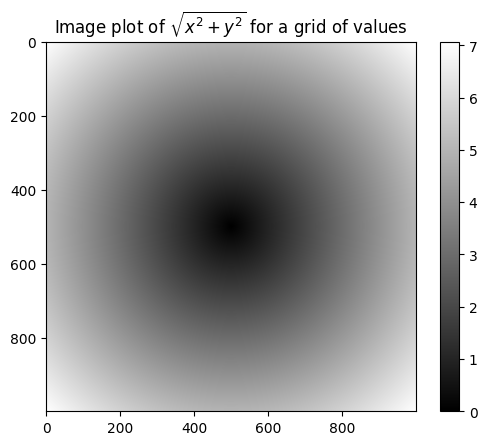

In [39]:
import matplotlib.pyplot as plt 
plt.imshow(z, 
           cmap=plt.cm.gray);
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


## Expressing Conditional Logic as Array Operations 

The `numpy.where` function is a vectorized version of the ternary experssion `x if condition else y`

In [40]:
# lets make a bool array (condition) and two arrays to work with 
cond = np.array([True, False, True, True, False])
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

We want to take a value from `xarr` whenever the corresponding vbalue in the condition is True, otherwise we want to take the value from `yarr`

This can be done using a list comprehension like so: 
- `[(x if condition else y) for x, y, condition in zip(xarr, yarr, cond)`

In [41]:
[(x if condition else y) for x, y, condition in zip(xarr, yarr, cond)]

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

Issues with this approach: 
    - not very fast with large arrays because all the work is being done in interpreted python code. 
    - will not work with multidimensional arrays. 


In [42]:
# write it with np.where

np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

Note: The second and third condition in `np.where` dont need to be arrays; one or both of thm can be scalars. 
- A typical use of `where` in data analysis is to produce a new array of values based on another array.

Use this syntax: 
- `np.where( condition, if_condition_is_true, if_condition_is_untrue)`

## Mathematical and Statistical Methods

- Aggregations (*reductions*) like `sum`, `mean`, `std`. 

You can either use the array instance method or the top-level NumPy function to call these. 
- `arr.mean()`
- `np.mean(arr)`
- `arr.sum()`

These functions take an optional axis argument. This will result in an array with one fewer dimension. 

- `cumsum()`  and `cumprod()` produce the cumulative product or sum *up to that point* in the specified axis. 

## Methods for Bool Arrays 

Boolean values are coerced to 1 (True and  (False in the preceding methods. Thus, `sum` is often used as a means of counting True values in a bool array. 

In [43]:
arr = np.random.randn(100)
arr

array([-0.0233579 ,  1.11400359,  1.5422017 , -0.89591376, -0.55353649,
        0.12478887, -0.58692216, -0.17182775,  1.0767491 ,  0.21945866,
       -0.77350138, -0.02761757,  0.64774863,  0.2036197 ,  0.41258831,
       -1.04367465, -1.83252762,  0.70580709, -0.27055502,  0.12254236,
        1.38766729, -2.34007814, -0.66985449,  0.42885537, -0.08052572,
        1.12860904, -0.95642616,  0.35546918,  0.30463934, -1.11254528,
        1.220193  ,  0.59054346, -0.63863074, -2.16506741, -1.24264634,
        0.25786656,  0.25650769, -0.06509242,  0.59288771,  0.300861  ,
        0.95621198, -1.12243896,  0.18344074, -0.15080476, -1.93576685,
       -0.44805187,  0.52494965,  0.10925599, -0.44878698,  0.97639128,
       -1.04331003,  1.04360012,  0.190664  ,  0.50737122, -0.94681685,
       -0.25202059, -0.58777983,  0.14853824,  0.31018532,  0.50767214,
       -2.15493339,  1.0425513 ,  1.02991538,  0.48339422, -0.5242588 ,
       -0.23250147,  1.29895799, -0.90016842,  1.42637472, -1.72

In [46]:
# Number of positive values: sum the bool array that is made on the condition >0 
(arr > 0).sum()

np.int64(52)

`any` and `all` are two more methods useful especially for boolean arrays. 
- `any` tests whether one or more values in an array is True
- `all` tests whether every value is True
These methods also work with non-boolean arrays, where non-zero elements evaluate to `True`

## Sorting

Arrays can be sorted *in place*

In [47]:
arr = np.random.randn(8)
arr

array([ 0.51911516,  0.35326077,  0.39988518, -0.69564192,  1.56515985,
       -0.87223594, -1.12445747,  0.78991085])

In [48]:
arr.sort()

In [49]:
arr

array([-1.12445747, -0.87223594, -0.69564192,  0.35326077,  0.39988518,
        0.51911516,  0.78991085,  1.56515985])

You can sort each one-dimensional section within a multi-dimensional array in-place along an axis by passing the **axis** to `sort()`.


In [50]:
arr = np.random.randn(8, 5)
arr

array([[ 2.10282581,  1.46355577, -0.12055825, -0.2665154 ,  0.33606786],
       [ 0.01150171, -0.91135468, -0.62893783,  0.05424285, -0.04481427],
       [-1.7341631 , -0.45737448,  0.50452354,  0.35158179,  1.44339406],
       [-0.48924922,  0.42684696, -0.57665748,  0.93941398, -0.26271718],
       [-0.1953238 ,  1.70563867,  0.12515936,  1.06538173, -0.42813273],
       [-1.39967459, -1.56267405,  1.06666092,  0.57933513, -0.48315754],
       [ 0.8384595 ,  1.56665437, -0.32333211, -0.12503147, -1.07147357],
       [ 0.432153  ,  0.50252156, -0.66587271,  0.23000867, -0.60593426]])

In [51]:
arr.sort(0)

In [52]:
arr

array([[-1.7341631 , -1.56267405, -0.66587271, -0.2665154 , -1.07147357],
       [-1.39967459, -0.91135468, -0.62893783, -0.12503147, -0.60593426],
       [-0.48924922, -0.45737448, -0.57665748,  0.05424285, -0.48315754],
       [-0.1953238 ,  0.42684696, -0.32333211,  0.23000867, -0.42813273],
       [ 0.01150171,  0.50252156, -0.12055825,  0.35158179, -0.26271718],
       [ 0.432153  ,  1.46355577,  0.12515936,  0.57933513, -0.04481427],
       [ 0.8384595 ,  1.56665437,  0.50452354,  0.93941398,  0.33606786],
       [ 2.10282581,  1.70563867,  1.06666092,  1.06538173,  1.44339406]])

The top-level method `np.sort()` **returns a sorted copy of the array** instead of modifying the array in-place.

In [54]:
# sort the whole array (top-down) at once 
np.sort(arr)

array([[-1.7341631 , -1.56267405, -1.07147357, -0.66587271, -0.2665154 ],
       [-1.39967459, -0.91135468, -0.62893783, -0.60593426, -0.12503147],
       [-0.57665748, -0.48924922, -0.48315754, -0.45737448,  0.05424285],
       [-0.42813273, -0.32333211, -0.1953238 ,  0.23000867,  0.42684696],
       [-0.26271718, -0.12055825,  0.01150171,  0.35158179,  0.50252156],
       [-0.04481427,  0.12515936,  0.432153  ,  0.57933513,  1.46355577],
       [ 0.33606786,  0.50452354,  0.8384595 ,  0.93941398,  1.56665437],
       [ 1.06538173,  1.06666092,  1.44339406,  1.70563867,  2.10282581]])

## Unique and Other Set Logic

Basic set operations for 1d `ndarrays`

In [59]:
# np.unique returns the sorted unique values in an array. 
arr = np.array(['we', 'we', 'Lee'])
arr

array(['we', 'we', 'Lee'], dtype='<U3')

In [60]:
np.unique(arr)

array(['Lee', 'we'], dtype='<U3')

Contrast `np.unique` with the pure python alternative. 
- `sorted(set(arr))`

Another function, `np.in1d`, tests membership of the values on one array in another, returning a bool array. 
- Syntax: `np.in1d(array1, array2)` returns a bool array. `array1_value = True` if its in `array2`

# 4.4 File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format. We will only discuss NumPy's built-in binary format, since most users will prefer pandas and other tools for loading text or tabular data. 

`np.save` and `np.load` are the two workhorse functions for efficiently saving and loading array data on disk. 
- Arrays are saved by default in an uncompressed raw binary format with file extension `.npy`.
- `np.save('some_array', arr)` Note we did not specify `.npy`, we dont have to, it will be appended to `some_array`.

...

# 4.5 Linear Algebra

Examples: 
- mattrix multiplication
- decompositions
- determinants
- square matrix math

All are an important part of any array library. 

Multiplying two 2d arrays with `*` is an element-wise product instead of a matrix dot product. Thus there is a function `dot`, both an array method and a function in the numpy namespace, for matrix multiplication: 

In [63]:
x = np.array([[1., 2., 3.],[4., 5., 6]])
y = np.array([[6., 23. ],[-1, 7], [8, 9]])

In [64]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [65]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [67]:
# dot product (mat mul) of x and y 
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

Or just use `np.dot(x, y)`

Thre `@` symbol also works as an **infix operator** that performs matrix multiplication.

In [68]:
x @ np.ones(3)

array([ 6., 15.])

`np.linalg` has a standard set of matrix decompositions and things like inverse and determinant. These are implemented under the hood via the same industry standard lin alg libraries use in other languages like MATLAB and R, such as BLAS, LAPACK, or possibly the proprietary Intel MKL. 

In [73]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)

# compute the dot product of X with its transpose, X.T
mat = X.T.dot(X)

In [74]:
inv(mat)

array([[ 2.70908753, -0.46360965, -1.52387515,  1.70367689, -1.52415219],
       [-0.46360965,  2.37172581, -1.09196201, -0.99270282,  0.07991333],
       [-1.52387515, -1.09196201,  1.88489242, -0.6110139 ,  1.11761243],
       [ 1.70367689, -0.99270282, -0.6110139 ,  1.57471947, -1.01523544],
       [-1.52415219,  0.07991333,  1.11761243, -1.01523544,  1.15311294]])

In [75]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -3.79313553e-16,  4.40103477e-16,
        -4.90586610e-16,  6.00387185e-16],
       [-4.26783332e-16,  1.00000000e+00,  4.15629056e-16,
         4.82692627e-16,  1.26749140e-15],
       [ 1.29827765e-15,  8.91323334e-16,  1.00000000e+00,
         6.86711126e-16,  8.31522661e-16],
       [-6.66535169e-16, -6.48563281e-17,  7.29133643e-16,
         1.00000000e+00,  4.19301476e-16],
       [ 6.47321804e-16, -1.18151249e-15,  5.87826254e-17,
         1.50155137e-16,  1.00000000e+00]])

In [76]:
q, r = qr(mat)

In [77]:
r

array([[-4.08811134, -3.15435109, -6.31901724,  1.78269462,  2.46209067],
       [ 0.        , -4.30113505, -5.80448202, -3.09128405,  3.48149293],
       [ 0.        ,  0.        , -2.68498759,  3.1329577 ,  6.05898139],
       [ 0.        ,  0.        ,  0.        , -0.83101441, -0.85751767],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.41034449]])

Most commonly used lin alg functions: 
- `diag` Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zero's on the off diagonal.
- `dot` matmul
- `trace` Compute the sum of the diagonal elements
- `det` compute the matrix determinant
- `eig`compute the eigenvalues and eigenvectors of a square matrix
- `inv` compute the inverse of a square matrix
- `pinv` compute the moore-penrose pseudo-inverse of a matrix
- `qr` compute the qr-decomposition
- `svd` compute the singular value decomposition(SVD)
- `solve` Solve the linear system `Ax=b` for `x`, where `A` is a square matrix
- `lstsq` Compute the least-squares solution to `Ax=b`

# 4.6 Pseudorandom Number Generation 

`numpy.random` module supplements the built-in python `random` with functions for efficiency generating whole arrays of sample values from many kinds of probability distributions. 

In [79]:
# get a 4x4 array of samples from the standard normal distribution using `normal`
samples = np.random.normal(size = (4, 4))
samples

array([[-0.51703283,  2.91625562,  0.56169545, -0.71817932],
       [ 0.0114251 , -0.82139648,  0.05399349, -1.08150959],
       [-0.61469956, -0.83275352,  0.78719286, -0.93082927],
       [-0.92806201,  0.19817552, -0.87455478,  0.63178279]])

Pythons `random` module, by contrast, only samples one value at a time, As you can see from this benchmark `numpy.random` is well over an order of magnitude faster for generating very large samples. 

In [80]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

405 ms ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [90]:
%timeit samples = [np.random.normal(size=N)]

17.5 ms ± 478 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We say that theseare **pseudorandom** numbers because they are generated by an algorithm with deterministic behavior based on the seed of the RNG. You can change the seed of NumPy's RNG using np.random.seed:
- `np.random.seed(1234)`

Note: the data generation funcitons in `numpy.random` use a global random seed. To avoid global state, you can use `numpy.random.RandomState` to create a RNG isolated from others. 
- `rng = np.random.RandomState(1234)`

Partial list of functions available in `numpy.random`
- `seed` Seed the rng
- `permutation` Rnadom permutation of a sequence, or return a permuted range
- `rand` Draw samples from a uniform distribution
- `randint`Draw random integersfrom a given low-to-high range
- `randn` Draw samples from a normal dist with mean 0 and sd 1
- `binomial` Draw samples from a binomial distribution
- `normal` Draw samples from a normal(Gaussian) distribution
- `beta` Draw samples from a beta distribution
- `chisquared` Draw samples fdrom a chi-square distribution
- `gamma` Draw samples from a gamma distribution
- `uniform` Draw samples from a uniform distribution. 

# 4.7 Example: Random Walks 

Utilizing array operations. 

Consider a simple random walk starting at 0 with steps of 1 and -1 occurring with equal probability. We will start with a pure python way to implement this with 1000 walks. 

In [91]:
import random 
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step 
    walk.append(position)

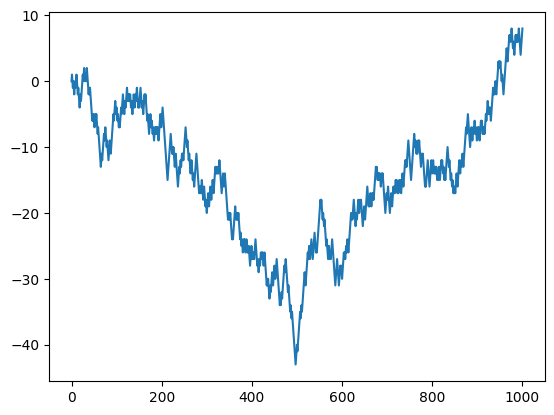

In [93]:
plt.plot(walk)

Now, we could make the observation that walk is simply the cumulative sum of the random steps and could be evaluated as an array expression. Thus, we use the `numpy.random` module to draw `1000` coin flips at once, set these to `1` and `-1`, and compute the cumulative sum:

In [96]:
nsteps = 1000
draws = np.random.randint(0,2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

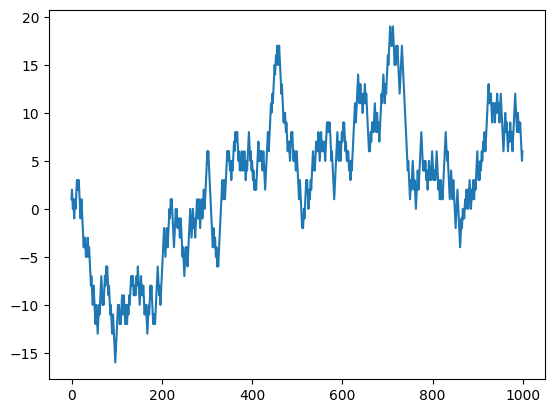

In [98]:
plt.plot(walk)

Extract stats: 


In [99]:
walk.sum()

np.int64(2606)

In [101]:
walk.mean()

np.float64(2.606)

In [102]:
walk.std()

np.float64(7.1986640427234825)

Lets look into the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin `0` in either direction. `np.abs(walk) >= 10` gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first `10` or `-10`. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the boolean array (True is the max value) 


In [103]:
(np.abs(walk) >= 10).argmax()

np.int64(47)

Note; Its not always efficient to use argmax here because it always makes a full ascan of the array. In this special case, once a True is observed, we know it to be the max value. 

## Simulating Many Random Walks at Once 

Make several random walks with minor modificatios to the preceding code. 
- if passed a 2-tuple, the `numpy.random` functions will generate a 2d array of draws
- we can compute the cumsum across the rows to compute, say, 5000 random walks in one shot.


In [104]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)

walks = steps.cumsum(1)

In [105]:
walks

array([[ -1,   0,  -1, ...,  52,  53,  52],
       [ -1,  -2,  -1, ...,  42,  41,  40],
       [  1,   0,   1, ...,  -4,  -5,  -6],
       ...,
       [  1,   0,  -1, ...,   6,   7,   8],
       [  1,   2,   1, ..., -22, -23, -24],
       [  1,   2,   1, ..., -16, -15, -16]], shape=(5000, 1000))

Now, we can compute the max and min values obtained over all of the walks. 

In [106]:
walks.max()

np.int64(132)

In [107]:
walks.min()

np.int64(-117)

Lets compute the minimum crossing time again. 

In [109]:
hits30 = (np.abs(walks) >=30).any(1)

In [110]:
hits30

array([ True,  True,  True, ..., False,  True,  True], shape=(5000,))

In [111]:
hits30.sum()

np.int64(3398)

Select out the rows (using the bool array) that actually cross the absolute 30 level and call `argmax` across axis `1` to get the crossing times. 

In [112]:
crossing_time = (np.abs(walks[hits30]) >= 30).argmax(1)

In [115]:
crossing_time

array([275, 541, 361, ..., 345, 819, 485], shape=(3398,))

Lastly we comput the average minimum crossing time. 

In [116]:
crossing_time.mean()

np.float64(503.77869334902886)